# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 593


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=metric&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}{city}"


    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-aux-francais
Processing Record 2 of Set 1 | east ballina
Processing Record 3 of Set 1 | adamstown
Processing Record 4 of Set 1 | carnarvon
Processing Record 5 of Set 1 | iwanai
Processing Record 6 of Set 1 | praia da vitoria
Processing Record 7 of Set 1 | tiksi
Processing Record 8 of Set 1 | waitangi
Processing Record 9 of Set 1 | hermanus
Processing Record 10 of Set 1 | puerto natales
Processing Record 11 of Set 1 | bethel
Processing Record 12 of Set 1 | devinuwara
City not found. Skipping...
Processing Record 13 of Set 1 | west fargo
Processing Record 14 of Set 1 | blackmans bay
Processing Record 15 of Set 1 | shuangcheng
Processing Record 16 of Set 1 | west island
Processing Record 17 of Set 1 | tarawa
Processing Record 18 of Set 1 | stanley
Processing Record 19 of Set 1 | yinchuan
Processing Record 20 of Set 1 | flying fish cove
Processing Record 21 of Set 1 | grytviken
Processing Record

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          568
Lat           568
Lng           568
Max Temp      568
Humidity      568
Cloudiness    568
Wind Speed    568
Country       568
Date          568
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,5.26,83,100,10.94,TF,1738190116
1,east ballina,-28.8667,153.5833,25.59,66,34,1.73,AU,1738190545
2,adamstown,-25.0660,-130.1015,25.84,78,6,6.48,PN,1738190366
3,carnarvon,-24.8667,113.6333,28.71,69,97,7.25,AU,1738190484
4,iwanai,42.9744,140.5089,-0.89,94,100,4.70,JP,1738190390


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,5.26,83,100,10.94,TF,1738190116
1,east ballina,-28.8667,153.5833,25.59,66,34,1.73,AU,1738190545
2,adamstown,-25.0660,-130.1015,25.84,78,6,6.48,PN,1738190366
3,carnarvon,-24.8667,113.6333,28.71,69,97,7.25,AU,1738190484
4,iwanai,42.9744,140.5089,-0.89,94,100,4.70,JP,1738190390


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

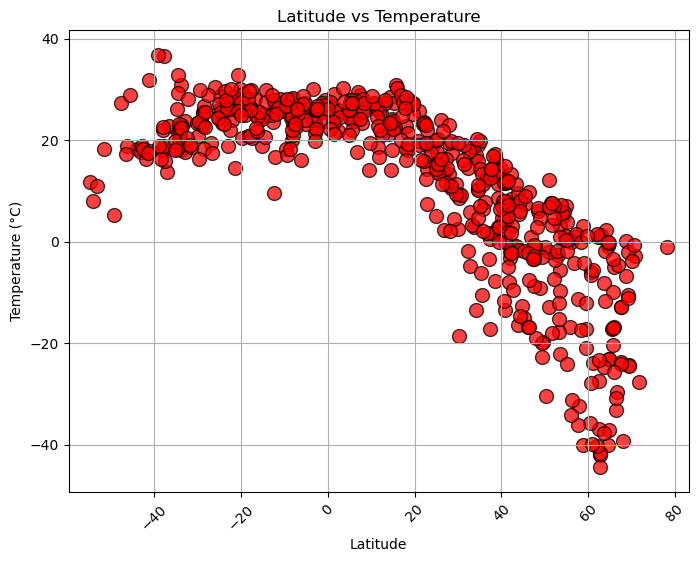

In [8]:
# Define x and y axis data
x_axis = city_data_df["Lat"]
data = city_data_df["Max Temp"]

# Build scatter plot with additional properties
plt.figure(figsize=(8, 6))
plt.scatter(x_axis, data, marker="o", facecolors="red", edgecolors="black",
            s=100, alpha=0.75)  # Set a fixed size instead of x_axis if needed

# Add graph properties
plt.title("Latitude vs Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature (°C)")
plt.grid(True)  # Adds a grid to the background
plt.xticks(rotation=45)  # Rotates x-axis labels for better readability
plt.xlim(min(x_axis) - 5, max(x_axis) + 5)  # Adjust x-axis range
plt.ylim(min(data) - 5, max(data) + 5)  # Adjust y-axis range

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

In [10]:
def regression_plot(df, x_col, y_col, unit, color, fig_num):
    # Define x and y axis data
    x_data = df[x_col]
    y_data = df[y_col]

    # Build scatter plot with additional properties
    plt.figure(figsize=(8, 6))
    plt.scatter(x_data, y_data, marker="o", facecolors=color, edgecolors="black",
                s=100, alpha=0.75)  # Set a fixed size instead of x_axis if needed

    # Add graph properties
    plt.title(f"{y_col} vs {x_col}")
    plt.xlabel(x_col)
    plt.ylabel(f"{y_col} ({unit})")
    plt.grid(True)  # Adds a grid to the background
    plt.xticks(rotation=45)  # Rotates x-axis labels for better readability
    plt.xlim(min(x_data) - 5, max(x_data) + 5)  # Adjust x-axis range
    plt.ylim(min(y_data) - 5, max(y_data) + 5)  # Adjust y-axis range

    # Save the figure
    plt.savefig(f"output_data/Fig{fig_num}.png")

    # Show plot
    plt.show()

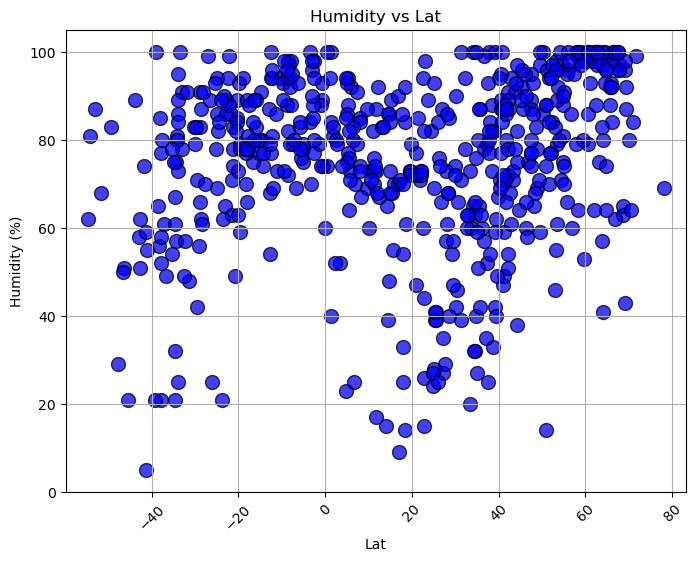

In [11]:
regression_plot(city_data_df,"Lat", "Humidity", "%", "blue", 2)

#### Latitude Vs. Humidity

In [ ]:
# Build the scatter plots for latitude vs. humidity
x_axis = city_data_df["Lat"]
data = city_data_df["Humidity"]

# Build scatter plot with additional properties
plt.figure(figsize=(8, 6))
plt.scatter(x_axis, data, marker="o", facecolors="red", edgecolors="black",
            s=100, alpha=0.75)  # Set a fixed size instead of x_axis if needed

# Add graph properties
plt.title("Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(True)  # Adds a grid to the background
plt.xticks(rotation=45)  # Rotates x-axis labels for better readability
plt.xlim(min(x_axis) - 5, max(x_axis) + 5)  # Adjust x-axis range
plt.ylim(min(data) - 5, max(data) + 5)  # Adjust y-axis range

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

In [ ]:
# Build the scatter plots for latitude vs. cloudiness
x_axis = city_data_df["Lat"]
data = city_data_df["Cloudiness"]
# Build scatter plot with additional properties
plt.figure(figsize=(8, 6))
plt.scatter(x_axis, data, marker="o", facecolors="red", edgecolors="black",
            s=100, alpha=0.75)  # Set a fixed size instead of x_axis if needed

# Add graph properties
plt.title("Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True)  # Adds a grid to the background
plt.xticks(rotation=45)  # Rotates x-axis labels for better readability
plt.xlim(min(x_axis) - 5, max(x_axis) + 5)  # Adjust x-axis range
plt.ylim(min(data) - 5, max(data) + 5)  # Adjust y-axis range


# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

In [ ]:
# Build the scatter plots for latitude vs. wind speed
x_axis = city_data_df["Lat"]
data = city_data_df["Wind Speed"]
# Build scatter plot with additional properties
plt.figure(figsize=(8, 6))
plt.scatter(x_axis, data, marker="o", facecolors="red", edgecolors="black",
            s=100, alpha=0.75)  # Set a fixed size instead of x_axis if needed

# Add graph properties
plt.title("Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(True)  # Adds a grid to the background
plt.xticks(rotation=45)  # Rotates x-axis labels for better readability
plt.xlim(min(x_axis) - 5, max(x_axis) + 5)  # Adjust x-axis range
plt.ylim(min(data) - 5, max(data) + 5)  # Adjust y-axis range


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data
x = np.array(city_data_df["Lat"])
y = np.array(city_data_df["Max Temp"])

# Calculate slope (m) and intercept (b)
m, b = np.polyfit(x, y, 1)

# Generate regression line values
regression_line = m * x + b

# Plot data points and regression line
plt.scatter(x, y, color="blue", label="Data Points")
plt.plot(x, regression_line, color="red", label=f"y = {m:.2f}x + {b:.2f}")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.title("Linear Regression using NumPy")
plt.grid()
plt.show()

In [ ]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
import numpy as np
import matplotlib.pyplot as plt
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]
northern_hemi_df

In [ ]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
import numpy as np
import matplotlib.pyplot as plt
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]
southern_hemi_df

###  Temperature vs. Latitude Linear Regression Plot

In [ ]:
# Linear regression on Northern Hemisphere
x = np.array(northern_hemi_df["Lat"])
y = np.array(northern_hemi_df["Max Temp"])

# Calculate slope (m) and intercept (b)
m, b = np.polyfit(x, y, 1)

# Generate regression line values
regression_line = m * x + b

# Plot data points and regression line
plt.scatter(x, y, color="blue", label="Data Points")
plt.plot(x, regression_line, color="red", label=f"y = {m:.2f}x + {b:.2f}")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.title("Linear Regression using NumPy")
plt.grid()
plt.show()
northern_hemi_df.head()

In [ ]:
# Linear regression on Southern Hemisphere

# Sample data
x = np.array(southern_hemi_df["Lat"])
y = np.array(southern_hemi_df["Max Temp"])

# Calculate slope (m) and intercept (b)
m, b = np.polyfit(x, y, 1)

# Generate regression line values
regression_line = m * x + b

# Plot data points and regression line
plt.scatter(x, y, color="blue", label="Data Points")
plt.plot(x, regression_line, color="red", label=f"y = {m:.2f}x + {b:.2f}")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.title("Linear Regression using NumPy")
plt.grid()
plt.show()
northern_hemi_df.head()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# Sample data
x = np.array(northern_hemi_df["Lat"])
y = np.array(northern_hemi_df["Humidity"])

# Calculate slope (m) and intercept (b)
m, b = np.polyfit(x, y, 1)

# Generate regression line values
regression_line = m * x + b

# Plot data points and regression line
plt.scatter(x, y, color="blue", label="Data Points")
plt.plot(x, regression_line, color="red", label=f"y = {m:.2f}x + {b:.2f}")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.title("Linear Regression using NumPy")
plt.grid()
plt.show()
northern_hemi_df.head()
# Display sample data
southern_hemi_df.head()

In [ ]:
# NortheSouthern Hemisphere
# Sample data
x = np.array(southern_hemi_df["Lat"])
y = np.array(southern_hemi_df["Humidity"])

# Calculate slope (m) and intercept (b)
m, b = np.polyfit(x, y, 1)

# Generate regression line values
regression_line = m * x + b

# Plot data points and regression line
plt.scatter(x, y, color="blue", label="Data Points")
plt.plot(x, regression_line, color="red", label=f"y = {m:.2f}x + {b:.2f}")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.title("Linear Regression using NumPy")
plt.grid()
plt.show()
northern_hemi_df.head()
# Display sample data
southern_hemi_df.head()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# Sample data
x = np.array(northern_hemi_df["Lat"])
y = np.array(northern_hemi_df["Cloudiness"])

# Calculate slope (m) and intercept (b)
m, b = np.polyfit(x, y, 1)

# Generate regression line values
regression_line = m * x + b

# Plot data points and regression line
plt.scatter(x, y, color="blue", label="Data Points")
plt.plot(x, regression_line, color="red", label=f"y = {m:.2f}x + {b:.2f}")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.title("Linear Regression using NumPy")
plt.grid()
plt.show()
northern_hemi_df.head()
# Display sample data
southern_hemi_df.head()

In [ ]:
# Southern Hemisphere
# Sample data
x = np.array(southern_hemi_df["Lat"])
y = np.array(southern_hemi_df["Cloudiness"])

# Calculate slope (m) and intercept (b)
m, b = np.polyfit(x, y, 1)

# Generate regression line values
regression_line = m * x + b

# Plot data points and regression line
plt.scatter(x, y, color="blue", label="Data Points")
plt.plot(x, regression_line, color="red", label=f"y = {m:.2f}x + {b:.2f}")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.title("Linear Regression using NumPy")
plt.grid()
plt.show()
northern_hemi_df.head()
# Display sample data
southern_hemi_df.head()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# Sample data
x = np.array(northern_hemi_df["Lat"])
y = np.array(northern_hemi_df["Wind Speed"])

# Calculate slope (m) and intercept (b)
m, b = np.polyfit(x, y, 1)

# Generate regression line values
regression_line = m * x + b

# Plot data points and regression line
plt.scatter(x, y, color="blue", label="Data Points")
plt.plot(x, regression_line, color="red", label=f"y = {m:.2f}x + {b:.2f}")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.title("Linear Regression using NumPy")
plt.grid()
plt.show()
northern_hemi_df.head()
# Display sample data
southern_hemi_df.head()

In [ ]:
# Southern Hemisphere
# Northern Hemisphere
# Sample data
x = np.array(southern_hemi_df["Lat"])
y = np.array(southern_hemi_df["Wind Speed"])

# Calculate slope (m) and intercept (b)
m, b = np.polyfit(x, y, 1)

# Generate regression line values
regression_line = m * x + b

# Plot data points and regression line
plt.scatter(x, y, color="blue", label="Data Points")
plt.plot(x, regression_line, color="red", label=f"y = {m:.2f}x + {b:.2f}")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.title("Linear Regression using NumPy")
plt.grid()
plt.show()
northern_hemi_df.head()
# Display sample data
southern_hemi_df.head()

**Discussion about the linear relationship:** YOUR RESPONSE HERE